# Linear regression:

Definition:<br>
Simple linear regression: <center>$y=\beta_{0}+\beta_{1}x_{1}+\epsilon$</center>
Multiple linear regression: <center>$y=\beta_{0}+\beta_{1}x_{1}+\ldots+\beta_{p}x_{p}+\epsilon$</center>
$y$ -response variable<br>
$x_i$ - explanatory variables<br>
$\epsilon$ - Error term

#### Why does it called "Linear":
Because it is combination of set of terms by multiplying each term by a constant(weights) and adding the results

#### Why does it called "Regression":

First some history:
Sir Francis Galton(1954-1822), english polymath and Charles Darwin's half-cousin.
His contributions to the science are many, such as:

* Psychology - Founded psychometrics.
* Eugenics - pioneer of eugenics - Coined the phrases "Eugenics" and  "nature versus nurture".
* Meteorology -  initiator of scientific meteorology, he devised the first weather map.
* Statistics - Created the concepts of correlation and regression to the mean.

He was studying data on relative sizes of parents and their offspring in various species of plants and animals, he observed the following phenomenon: a larger-than-average parent tends to produce a larger-than-average child, but the child is likely to be less large than the parent and smaller-than-average parent tends to produce a smaller-than-average child, but the child is likely to be less small than the parent, he showed it with simple leaner regression -> Galton termed this phenomenon a regression towards mediocrity, which in modern terms is a **regression to the mean**, so this is where the name regression came from.

## regression to the mean

Recreating regressionto the mean experiment.<br>
Galton’s data consisted of 898 adult children and 197 “parentages” – that is to say, father-and-mother couples.<br>
He represented the height of parents using a single statistic, the “mid-parent”, this being the mean of the height of the father and of his wife’s height multiplied by 1.08.<br>
For the female children the heights were also multiplied by 1.08. For the male children they were unadjusted.

In [2]:
%load_ext autoreload
%autoreload

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Galton data sets locations
GALTON_DATA_LOC='../datasets/Galton/Galton.txt'

In [3]:
# Read data
data =[]
with open (GALTON_DATA_LOC, 'r') as f:
    data.append([row for row in csv.reader(f,delimiter='\t')])
galton_df = pd.DataFrame(data[0][1:], columns=data[0][0])

# convert to float
galton_df.Mother = galton_df.Mother.astype(float)
galton_df.Father = galton_df.Father.astype(float)
galton_df.Height = galton_df.Height.astype(float)

# Calculate 'mid-parent' and adjuest female height
galton_df['mid-parent'] = (galton_df.Father + galton_df.Mother) / 2
galton_df.Height = np.where((galton_df.Gender == 'F'), galton_df.Height, galton_df.Height)

# get the range of the graph limits
min_range = min(min(galton_df['mid-parent']),min(galton_df['Height']))
max_range = max(max(galton_df['mid-parent']),max(galton_df['Height']))
graph_range = range(int(min_range), int(max_range))

# make the height array and it mean array
height = np.asarray(galton_df['Height'].tolist())
height_mean = np.mean(np.asarray(galton_df['Height'].tolist()))
height_mean_arr = np.array(len(graph_range) * [height_mean])

# make the mid-parent array and it mean array
midparent = np.asarray(galton_df['mid-parent'].tolist())
midparent_mean = np.mean(np.asarray(galton_df['mid-parent'].tolist()))
midparent_mean_arr = np.array(len(graph_range) * [midparent_mean])

# regress line(y=mx+b)
m_height, b_height = np.polyfit(height, midparent, 1)
m_midparent, b_midparent = np.polyfit(midparent, height, 1)

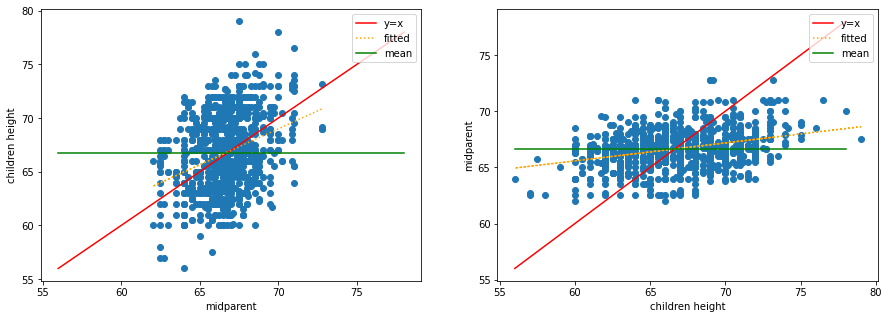

In [4]:
# Plot 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.scatter(midparent, height)
ax1.plot(graph_range, graph_range, label ='y=x', color='red')
ax1.plot(midparent, m_midparent* midparent + b_midparent, linestyle = 'dotted', label ='fitted', color='orange')
ax1.plot(graph_range, height_mean_arr, label ='mean', color='green')
ax1.set_xlabel('midparent')
ax1.set_ylabel('children height')
ax1.legend(loc="upper right")

ax2.scatter(height, midparent)
ax2.plot(graph_range, graph_range, label ='y=x', color='red')
ax2.plot(height, m_height* height + b_height, linestyle = 'dotted', label ='fitted', color='orange')
ax2.plot(graph_range, midparent_mean_arr, label ='mean', color='green')
ax2.set_xlabel('children height')
ax2.set_ylabel('midparent')
ax2.legend(loc="upper right")

The line that is produced(fitted- orange line) is less steep than the line of exact equality(y=x- red line).<br>
The consequence is that we may expect that an adult child is closer to average(mean- green line) height than its parents.<br>
But also -> that parents are closer to average height than is their child.

### Question/Answers

Question1:<br>
why multiply by 1.08:

Answer1:<br>
Quote: "In every case I transmuted the female statures to their corresponding male equivalents and used them in their transmuted form, so that no objection grounded on the sexual difference of stature need be raised when I speak of averages. The factor I used was 1'08, which is equivalent to adding a little less than one-twelfth to each female height."

Question2:<br>
If I would take a test and get a high score, and then take another one and get another high score, does it mean that the phenomena is not true?

Answer2:<br>
No! the phenomena is for the whole population, not for an individual

Question3:<br>
And what if everyone get a higher score?

Answer3:<br>
The mean and distribution can be change, the phenomena is regrading the scores of second test.

Question4:<br>
When does regression to the mean happen 

Answer4:<br>
Whenever the correlation between the explanatory variables and the response variable is imperfect(not 1 or -1). explanation next

# math
Some definitions:
* variable - a measurable function defined on a probability space that maps from the sample space to the real numbers.
* variance - average squared deviation from its own mean.
* standard deviation - square root of the variance.
* z-score, $x^*=\frac{x-\mu_x}{\sigma_x}$, measure distance from the mean in standard deviation units.
* coefficient of correlation -  $r_{xy}$, strength of the linear relationship between two variables on range between -1  and 1. calculated as follows: $r_{xy}=\frac{(x_1^*y_1^*+...+x_n^*y_n^*)}{n-1}$

Important notes:
* **In using linear models for prediction, predicting Y from X depend only on the means and standard deviations of X and Y and on their coefficient of correlation.**
* **On a scatterplot of $y^*$ versus $x^*$, the line for predicting $y^*$ from $x^*$ so as to minimize mean squared error is the line that passes through the origin and has slope $r_{xy}$: 
$\hat{Y}^*=r_{xy}x^*$**

#### Linear regression equation for predicting Y from X in unstandardized terms:
Predicting $y^*$ from $x^*$:
<center>$\hat{Y}^*=r_{xy}x^*$</center>
->
<center>$\frac{\hat{Y}-\mu_y}{\sigma_y}=\rho_{xy}\frac{x-\mu_x}{\sigma_x}$</center>
->
<center>$\hat{Y}=\mu_y-\rho_{xy}\frac{\sigma_y}{\sigma_x}*\mu_x+\rho_{xy}\frac{\sigma_y}{\sigma_x}*x$</center>

Where:
<center>$b_0=\mu_y-b_1\mu_x$</center>
<center>$b_1=\rho_{xy}\frac{\sigma_y}{\sigma_x}$</center>
->
<center>$\hat{Y}=b_0+b_1*X$</center>


* If $r_{xy}$ is not 1 or -1(imperfect) then any value that for $y^*$ will be closer to the mean than $x^*$ - which is Galton's phenomenon of regression to the mean.

Another way to think of the regression effect is in terms of selection bias. In general a player’s performance over any given period of time can be attributed to a combination of skill and luck. Suppose that we select a sample of professional athletes whose performance was much better than average (or students whose grades were much better than average) in the first half of the year.  The fact that they did so well in the first half of the year makes it probable that both their skill and their luck were better than average during that period. In the second half of the year we may expect them to be equally skillful, but we should not expect them to be equally lucky. So we should predict that in the second half their performance will be closer to the mean.  Meanwhile, players whose performance was merely average in the first half probably had skill and luck working in opposite directions for them.  We should therefore expect their performance in the second half to move away from the mean in one direction or another, as we get another independent test of their skill.  We don’t know which direction they will move, though, so even for them we should predict that their second half performance will be closer to the mean than their first half performance.  However, the actual performance of the players should be expected to have an equally large variance in the second half of the year as in the first half, because it merely results from a redistribution of independently random luck among players with the same distribution of skill as before.

# Resources:<br>
[1]https://galton.org/essays/1880-1889/galton-1886-jaigi-regression-stature.pdf<br>
[2]http://www.randomservices.org/random/<br>
[3]http://people.duke.edu/~rnau/regintro.htm<br>
[4]https://rss.onlinelibrary.wiley.com/doi/epdf/10.1111/j.1740-9713.2011.00509.x<br>
[5]https://www.youtube.com/watch?v=aLv5cerjV0c&t=881s&ab_channel=JoelSchneider<br>
[6]https://www.wikiwand.com/en/Simple_linear_regression#/Fitting_the_regression_line<br>
[7]https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#For_a_sample<br>
[8]https://en.wikipedia.org/wiki/Linear_combination#:~:text=In%20mathematics%2C%20a%20linear%20combination,a%20and%20b%20are%20constants).